Loading dataset...
Dataset shape: (27000, 3072)
Number of classes: 10

Testing specific image retrieval:
Image shape: (3072,)
Image class: AnnualCrop
First few pixel values: [149. 121. 120. 148. 119. 120. 150. 120. 122. 148.]


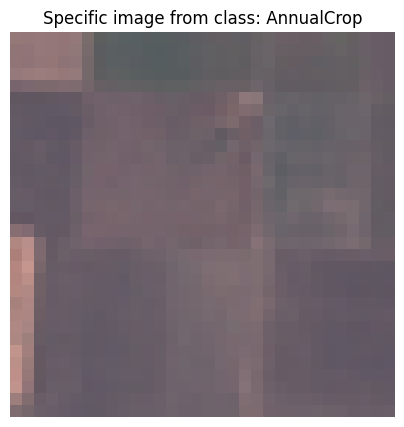

In [4]:
# Import the COC131 class
from coursework import COC131
import numpy as np
import matplotlib.pyplot as plt
from coursework import COC131

# Create an instance of the class
coc_instance = COC131()

# Test 1: Load the entire dataset
print("Loading dataset...")
coc_instance.q1()

# Check if data was loaded properly
print(f"Dataset shape: {coc_instance.x.shape if hasattr(coc_instance, 'x') else 'Not loaded'}")
print(f"Number of classes: {len(set(coc_instance.y)) if hasattr(coc_instance, 'y') else 'Not loaded'}")

# Test 2: Check a random image (if you know a specific filename)
# Replace "sample_image.jpg" with an actual image filename from your dataset
test_filename = "AnnualCrop_1.jpg"  # Change this to a real filename in your dataset
img_array, class_name = coc_instance.q1(filename=test_filename)

print(f"\nTesting specific image retrieval:")
print(f"Image shape: {img_array.shape}")
print(f"Image class: {class_name}")
print(f"First few pixel values: {img_array[:10]}")

# Visualize the specific image that was returned
if img_array is not None:
    # Reshape the specific image back to 32x32x3
    specific_img = img_array.reshape(32, 32, 3)
    
    # Since these are float values, we need to ensure they're in a valid range for display
    specific_img = np.clip(specific_img, 0, 255).astype(np.uint8)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(specific_img)
    plt.title(f"Specific image from class: {class_name}")
    plt.axis('off')
    plt.show()


--- Testing q2: Data Standardization ---
Original data shape: (1000, 3072)
Original data range: [18.00, 221.00]
Original standard deviation: 17.36
Standardized data shape: (1000, 3072)
Standardized data mean: 0.0000
Standardized data std: 2.5000
✓ Standard deviation is correctly set to approximately 2.5


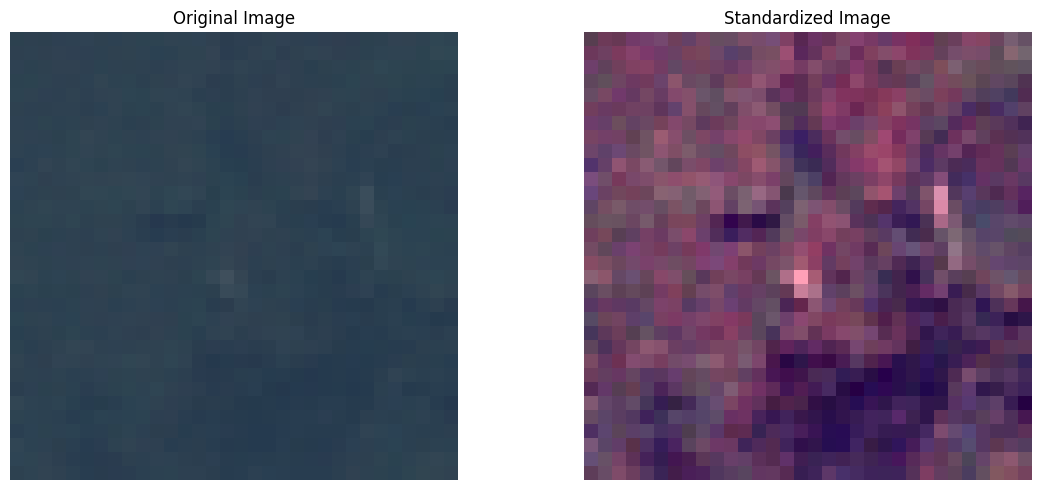


Checking inverse transform:
Mean Squared Error between original and reconstructed: 0.000000
✓ Reconstruction is accurate


In [5]:
# After your q1 testing code, add this to test q2:

# Test q2 with the dataset loaded from q1
print("\n--- Testing q2: Data Standardization ---")

# Make sure we have data from q1
if hasattr(coc_instance, 'x') and coc_instance.x.size > 0:
    # Take a subset to speed up processing if needed
    subset_size = min(1000, len(coc_instance.x))
    data_subset = coc_instance.x[:subset_size]
    
    print(f"Original data shape: {data_subset.shape}")
    print(f"Original data range: [{data_subset.min():.2f}, {data_subset.max():.2f}]")
    print(f"Original standard deviation: {data_subset.std():.2f}")
    
    # Standardize the image data (note the order: standardized_images, scaler)
    standardized_data, scaler = coc_instance.q2(data_subset)
    
    print(f"Standardized data shape: {standardized_data.shape}")
    print(f"Standardized data mean: {standardized_data.mean():.4f}")
    print(f"Standardized data std: {standardized_data.std():.4f}")
    
    # Verify the standard deviation is close to 2.5
    if abs(standardized_data.std() - 2.5) < 0.1:
        print("✓ Standard deviation is correctly set to approximately 2.5")
    else:
        print("✗ Standard deviation is not close to 2.5")
    
    # Visualize an original and standardized image
    plt.figure(figsize=(12, 5))
    
    # Original image
    img = data_subset[0].reshape(32, 32, 3)
    img = np.clip(img, 0, 255).astype(np.uint8)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    
    # Standardized image (needs rescaling for visualization)
    std_img = standardized_data[0].reshape(32, 32, 3)
    # Scale to 0-255 range for visualization
    std_img = (std_img - std_img.min()) / (std_img.max() - std_img.min()) * 255
    std_img = std_img.astype(np.uint8)
    plt.subplot(1, 2, 2)
    plt.imshow(std_img)
    plt.title("Standardized Image")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Can we transform back?
    print("\nChecking inverse transform:")
    # Get a flattened version of the standardized data
    if len(standardized_data.shape) > 2:
        std_flat = standardized_data.reshape(standardized_data.shape[0], -1)
    else:
        std_flat = standardized_data
    
    # Inverse transform (divide by 2.5 first since we scaled it up)
    inverse_transform = scaler.inverse_transform(std_flat / 2.5)
    
    # Reshape back if needed
    if len(data_subset.shape) > 2:
        inverse_transform = inverse_transform.reshape(data_subset.shape)
    
    # Check the difference
    mse = ((data_subset - inverse_transform) ** 2).mean()
    print(f"Mean Squared Error between original and reconstructed: {mse:.6f}")
    
    if mse < 1e-10:
        print("✓ Reconstruction is accurate")
    else:
        print("✗ Reconstruction has errors")
else:
    print("Image dataset not loaded. Run q1() first to load the dataset.")